<a href="https://colab.research.google.com/github/dagnert/exercises-neural-networks/blob/main/NN%2CCNN%2CRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.0


#Neural Network

In [9]:
#load necessary dataset, in this case it is part of the standard keras datasets
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
#define possible labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## EDA

In [11]:
#check the shape of the train data set
train_images.shape

(60000, 28, 28)

 there are 60.000 pictures with 28x28 pixels

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
#check the shape of the test data set
test_images.shape

(10000, 28, 28)

The test data set got 10.000 values, also with pictures with 28x28 pixels

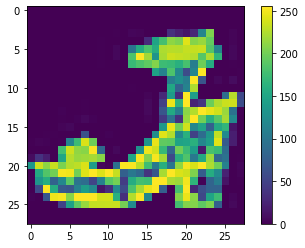

In [15]:
#If you inspect a random image in the training set, you will see that the pixel values fall in the range of 0 to 255
plt.figure()
plt.imshow(train_images[60])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

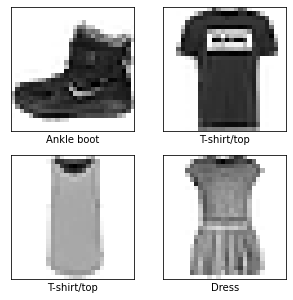

In [17]:
#let's display the first 4 images from the training set and display the class name below each image
plt.figure(figsize=(5,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##Simple NN

Build the model

* **Flatten Layer:** Flatten is used to flatten the input. For example, if flatten is applied to layer having input shape as (batch_size, 2,2), then the output shape of the layer will be (batch_size, 4)
* **Dense Layer:** A common classifier for neural networks. The dense layer scans downward from the pooling layer. In this layer, every node is connected to every node in the previous layer.

In [21]:
EPOCHS_SEQ = 10
X_SEQ = train_images 
y_SEQ = train_labels

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Compile and train the built model

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.fit(X_SEQ, y_SEQ, epochs=EPOCHS_SEQ)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6259 - accuracy: 0.7877
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3866 - accuracy: 0.8583
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3399 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3177 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2815 - accuracy: 0.8943
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2675 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2552 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2461 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

Check the accuracy of the model

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3522 - accuracy: 0.8791

Test accuracy: 0.8791000247001648


#CNN

In [25]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

##EDA

In [55]:
#split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [50]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

[4]


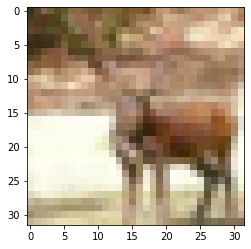

In [51]:
i=1001
plt.imshow(x_train[i])
print(y_train[i])
plt.ioff()

##Settings of the training and train test split

In [56]:
#some vars to controll the training
batch_size = 32
num_classes = 10 #fixed!
epochs = 5

In [57]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [58]:
#pre-processing: normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

##AlexNet CNN

In [59]:
model = Sequential()
#conv 1
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:])) #use padding to handle border effects of the convolution
model.add(Activation('relu'))
#conv 2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#conv 3
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#conv 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#FC1
model.add(Flatten()) #3D conv output to 1D FC input
model.add(Dense(512))
model.add(Activation('relu'))
#FC2
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [60]:
# initiate optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [61]:
#have a look at the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 15, 15, 64)       

In [62]:
#train model
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              shuffle=True)#shuffel is important - otherwise the NN night memorite the sequence of the training data

Epoch 1/5
1563/1563 [==============================] - 229s 146ms/step - loss: 1.8432 - accuracy: 0.3330
Epoch 2/5
1563/1563 [==============================] - 227s 145ms/step - loss: 1.3920 - accuracy: 0.5017
Epoch 3/5
1563/1563 [==============================] - 229s 146ms/step - loss: 1.2133 - accuracy: 0.5714
Epoch 4/5
1563/1563 [==============================] - 228s 146ms/step - loss: 1.0855 - accuracy: 0.6217
Epoch 5/5
1563/1563 [==============================] - 230s 147ms/step - loss: 0.9915 - accuracy: 0.6536


In [63]:
#eval model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 11s 35ms/step - loss: 0.9860 - accuracy: 0.6613
Test loss: 0.9860209226608276
Test accuracy: 0.661300003528595


Accuracy is due to only 5 epochs not bad, but could be optimized by changing some of the params

#RNN

In [78]:
from __future__ import absolute_import, division, print_function

# Import TensorFlow v2.
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np
from tensorflow.keras.datasets import mnist

## MNIST dataset parameters

In [75]:
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

Training params

In [76]:
learning_rate = 0.001
training_steps = 1000
batch_size = 32
display_step = 100

Network Parameters

In [77]:
# MNIST image shape is 28*28px, we will then handle 28 sequences of 28 timesteps for every sample.
num_input = 28 # number of sequences.
timesteps = 28 # timesteps.
num_units = 32 # number of neurons for the LSTM layer.

 Prepare MNIST data

In [79]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, 28, 28]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [80]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

##Create the LSTM model

In [81]:
class LSTM(Model):
    # Set layers.
    def __init__(self):
        super(LSTM, self).__init__()
        # RNN (LSTM) hidden layer.
        self.lstm_layer = layers.LSTM(units=num_units)
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x, is_training=False):
        # LSTM layer.
        x = self.lstm_layer(x)
        # Output layer (num_classes).
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

##Build the LSTM model

In [82]:
lstm_net = LSTM()

## Cross-Entropy Loss

In [85]:
# Note that this will apply 'softmax' to the logits.
def cross_entropy_loss(x, y):
    # Convert labels to int 64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Adam optimizer.
optimizer = tf.optimizers.Adam(learning_rate)

##Optimization process

In [86]:
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = lstm_net(x, is_training=True)
        # Compute loss.
        loss = cross_entropy_loss(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = lstm_net.trainable_variables

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update weights following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

##Run training

In [87]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = lstm_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 100, loss: 1.494543, accuracy: 0.562500
step: 200, loss: 0.908230, accuracy: 0.718750
step: 300, loss: 0.653096, accuracy: 0.875000
step: 400, loss: 0.700145, accuracy: 0.843750
step: 500, loss: 0.865915, accuracy: 0.656250
step: 600, loss: 0.585385, accuracy: 0.906250
step: 700, loss: 0.663961, accuracy: 0.812500
step: 800, loss: 0.508744, accuracy: 0.812500
step: 900, loss: 0.377093, accuracy: 0.906250
step: 1000, loss: 0.463407, accuracy: 0.843750
